In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import scvelo as scv

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(2, 2), transparent=False, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
PIL                 8.1.1
anndata             0.7.5
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
future_fstrings     NA
google              NA
h5py                2.10.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.7.0
jupyterlab_s

In [9]:
E125_loom = sc.read_loom('./../data_10x/E12-5/velocyto/E12-5.loom')
E145_loom = sc.read_loom('./../data_10x/E14-5/velocyto/E14-5.loom')
E165_loom = sc.read_loom('./../data_10x/E16-5/velocyto/E16-5.loom')
E185_loom = sc.read_loom('./../data_10x/E18-5/velocyto/E18-5.loom')
P15_loom = sc.read_loom('./../data_10x/P1-5/velocyto/P1-5.loom')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [10]:
E125_loom.var_names_make_unique()
E145_loom.var_names_make_unique()
E165_loom.var_names_make_unique()
E185_loom.var_names_make_unique()
P15_loom.var_names_make_unique()

In [11]:
samples = ["E-12.5", "E-14.5", "E-16.5", "E-18.5", "P-1.5"]
intestine_loom = E125_loom.concatenate(E145_loom, E165_loom, E185_loom, P15_loom, batch_key= "sample", batch_categories=samples)

In [12]:
intestine_loom.obs_names_make_unique()
intestine_loom.var_names_make_unique()
intestine_loom.obs

,Clusters,_X,_Y,sample
E12-5:AAACGCTAGTCGTTACx-E-12.5,13,9.717234,44.302647,E-12.5
E12-5:AAAGAACGTAATGCTCx-E-12.5,15,43.069283,-10.421278,E-12.5
E12-5:AAACGAAAGATGCCGAx-E-12.5,12,16.207983,20.840374,E-12.5
E12-5:AAACCCAAGGCCTTGCx-E-12.5,0,29.655142,31.881525,E-12.5
E12-5:AAAGGATGTGAGTTGGx-E-12.5,13,17.166792,46.572227,E-12.5
...,...,...,...,...
P1-5:TTTGATCTCTGCTGAAx-P-1.5,14,0.834368,-9.419877,P-1.5
P1-5:TTTAGTCGTGGTCTATx-P-1.5,1,-13.012780,39.608204,P-1.5
P1-5:TTTCGATAGCTAAATGx-P-1.5,8,-39.854210,17.820641,P-1.5
P1-5:TTTGGAGTCCCATAAGx-P-1.5,5,-30.262318,3.202617,P-1.5


In [15]:
intestine_1 = sc.read_h5ad("./../pyobjs_github/intestine1.h5ad")
intestine_1.obs_names

Index(['AAACCCAAGACTCTAC-1-E-12.5', 'AAACCCAAGCCATTGT-1-E-12.5',
       'AAACCCAAGGCCTTGC-1-E-12.5', 'AAACCCAAGGGCTGAT-1-E-12.5',
       'AAACCCAAGTACAACA-1-E-12.5', 'AAACCCACAAGCCCAC-1-E-12.5',
       'AAACCCACAGAAATCA-1-E-12.5', 'AAACCCACAGACGCTC-1-E-12.5',
       'AAACCCACATTAAGCC-1-E-12.5', 'AAACCCAGTCAGCTTA-1-E-12.5',
       ...
       'TTTGTTGCAACATACC-1-P-1.5', 'TTTGTTGCAAGCAATA-1-P-1.5',
       'TTTGTTGCAGCAGACA-1-P-1.5', 'TTTGTTGCAGTATGAA-1-P-1.5',
       'TTTGTTGGTAAGAACT-1-P-1.5', 'TTTGTTGGTATGCTTG-1-P-1.5',
       'TTTGTTGGTCCCTCAT-1-P-1.5', 'TTTGTTGGTCCGGTCA-1-P-1.5',
       'TTTGTTGTCCCTCTAG-1-P-1.5', 'TTTGTTGTCCGGACTG-1-P-1.5'],
      dtype='object', length=37277)

In [16]:
intestine_loom.obs_names = [a.split(":", 1)[1].replace("x", "-1") for a in intestine_loom.obs_names]

In [17]:
intestine_loom = intestine_loom[intestine_1.obs_names,]
print(intestine_loom.shape)

(37277, 31053)


In [19]:
intestine_loom = scv.utils.merge(intestine_1.raw.to_adata(), intestine_loom)

In [20]:
#scv.pp.filter_and_normalize(intestine_loom)
scv.pp.moments(intestine_loom)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:35) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:27) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [21]:
scv.tl.velocity(intestine_loom, mode='stochastic')

computing velocities
    finished (0:01:24) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [22]:
scv.tl.velocity_graph(intestine_loom)

computing velocity graph
    finished (0:01:26) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [48]:
intestine_loom.write_loom("./../pyobjs/intestine_loom.loom", write_obsm_varm=True)

In [4]:
intestine_loom = sc.read_loom("./../pyobjs/intestine_loom.loom")

saving figure to file ./figures/scvelo_proportions_intestine_splicing_qc.pdf


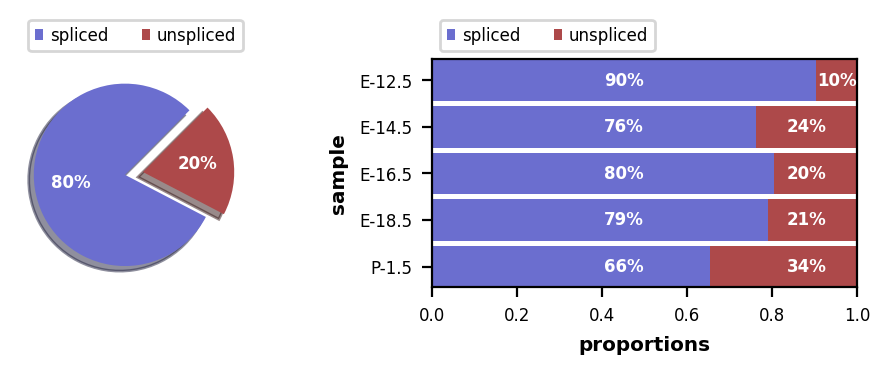

In [23]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
scv.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=False, format="pdf")
scv.pl.proportions(intestine_loom, groupby = "sample", save="intestine_splicing_qc", fontsize=6, figsize=(6,1.5), use_raw=True)

computing velocity embedding
    finished (0:00:11) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


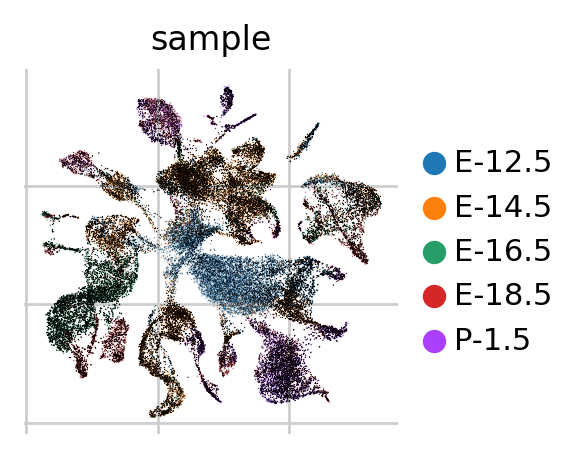

In [24]:
scv.pl.velocity_embedding(intestine_loom, color="sample", arrow_length=3, arrow_size=2, dpi=120, legend_loc='center right')

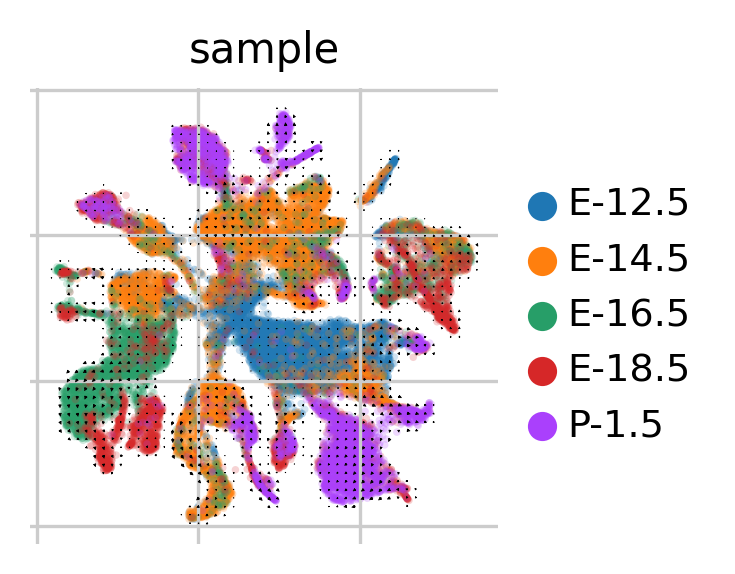

In [25]:
scv.pl.velocity_embedding_grid(intestine_loom, color="sample", legend_loc='center right')

saving figure to file ./figures/scvelo_intestine_stage_umap.pdf


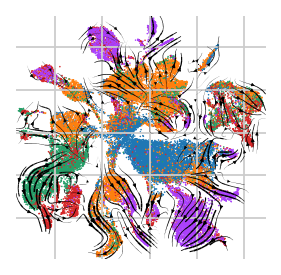

In [10]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
scv.pl.velocity_embedding_stream(intestine_loom, color="sample", legend_loc='none', linewidth=0.5, min_mass=0, size = 2, alpha=1.0, title="", arrow_size=0.3, save="intestine_stage_umap")

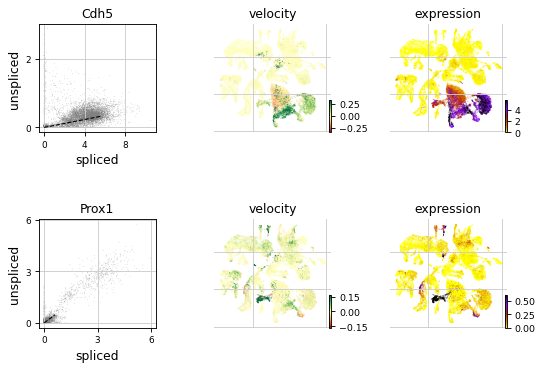

In [159]:
scv.pl.velocity(intestine_loom, ['Cdh5', 'Prox1'], ncols=1)

In [30]:
small_muscle = sc.read_h5ad("./../pyobjs_github/small_muscle.h5ad")
small_muscle.obs_names

Index(['AAACCCAGTTTACTGG-1-E-12.5', 'AAACGAACAGGTCAAG-1-E-12.5',
       'AAACGAAGTCAAGTTC-1-E-12.5', 'AAACGAAGTTTACGAC-1-E-12.5',
       'AAACGCTGTAACCAGG-1-E-12.5', 'AAACGCTTCTTTGCAT-1-E-12.5',
       'AAAGGATGTATTTCCT-1-E-12.5', 'AAAGGGCAGTAAGCAT-1-E-12.5',
       'AAAGTCCAGGTAATCA-1-E-12.5', 'AAAGTCCCAACAAGAT-1-E-12.5',
       ...
       'TTTGACTGTGCTGATT-1-P-1.5', 'TTTGACTTCATTACTC-1-P-1.5',
       'TTTGGAGAGATCCAAA-1-P-1.5', 'TTTGTTGAGAACTTCC-1-P-1.5',
       'TTTGTTGAGACCGCCT-1-P-1.5', 'TTTGTTGAGGTTGGTG-1-P-1.5',
       'TTTGTTGCAACATACC-1-P-1.5', 'TTTGTTGCAAGCAATA-1-P-1.5',
       'TTTGTTGCAGCAGACA-1-P-1.5', 'TTTGTTGGTCCGGTCA-1-P-1.5'],
      dtype='object', length=7519)

In [31]:
small_muscle_loom = intestine_loom[small_muscle.obs_names,]
print(small_muscle_loom.shape)

(7519, 19652)


In [32]:
small_muscle_loom = scv.utils.merge(small_muscle.raw.to_adata(), small_muscle_loom)

In [33]:
scv.pp.moments(small_muscle_loom)

computing neighbors
    finished (0:00:31) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:06) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [34]:
scv.tl.velocity(small_muscle_loom, mode='stochastic')

computing velocities
    finished (0:00:14) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [35]:
scv.tl.velocity_graph(small_muscle_loom)

computing velocity graph (using 1/80 cores)


  0%|          | 0/7519 [00:00<?, ?cells/s]

    finished (0:00:33) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


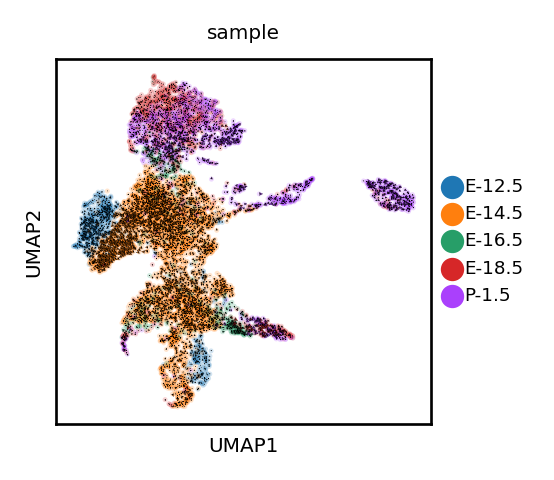

In [36]:
scv.pl.velocity_embedding(small_muscle_loom, color="sample", arrow_length=3, arrow_size=2, dpi=120, legend_loc='center right')

figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_muscle_stage_umap_velocity.png


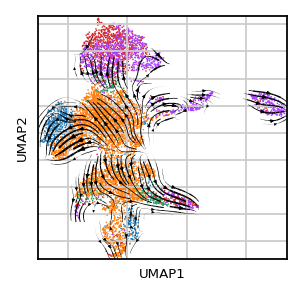

In [38]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
scv.pl.velocity_embedding_stream(small_muscle_loom, color="sample", legend_loc='none', linewidth=0.5, min_mass=0, size = 2, alpha=1.0, title="", arrow_size=0.3, save="muscle_stage_umap_velocity")